# Inverse distance weighting (IDW) 
- One of Geographic information system interpolation
- Goal : (latitude, longitude, air pollution <- interpolation!)

## 1. Import Packages

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import idw
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os

## 2. Ground Truth

In [49]:
dataset = pd.read_csv("air_pollution_new/Hour_01.csv", header = None)
data = dataset.values[:,:]

latitude = data[:,1]
longitude = data[:,2]
z = data[:,3]

In [50]:
coo = []

for i in range(len(z)):
    coo.append([latitude[i], longitude[i]])

In [51]:
zz = []
for i in range(len(z)):
    zz.append([z[i]])

In [52]:
coo = np.array(coo)
zz = np.array(zz)
coo1 = np.array(coo[:,0])
coo2 = np.array(coo[:,1])

In [80]:
print(coo.shape)
print(coo1.shape)
print(coo2.shape)
print(zz.shape)

(314, 2)
(314,)
(314,)
(314, 1)


In [55]:
# create sample points with structured scores
X1 = coo
z1 = zz

In [56]:
print("Shape :", X1.shape)
print("MAX :", np.max(X1))
print("MIN :", np.min(X1))

Shape : (314, 2)
MAX : 1271.7
MIN : 33.256


## 3. Train and Test

In [59]:
idw_tree = idw.tree(X1, z1)

In [60]:
new_lat = np.arange(34, 37.51, 0.0351)
new_lon = np.arange(126, 130.001, 0.0403)

print(new_lat.shape)
print(new_lon.shape)

(100,)
(100,)


In [61]:
X2 = np.meshgrid(new_lat, new_lon)
np.shape(X2)

(2, 100, 100)

In [62]:
grid_shape = X2[0].shape

In [63]:
X2 = np.reshape(X2, (2, -1)).T
X2.shape

(10000, 2)

In [64]:
z2 = idw_tree(X2)

In [65]:
print(X2.shape)
print(z2.shape)

(10000, 2)
(10000,)


## 4. Results

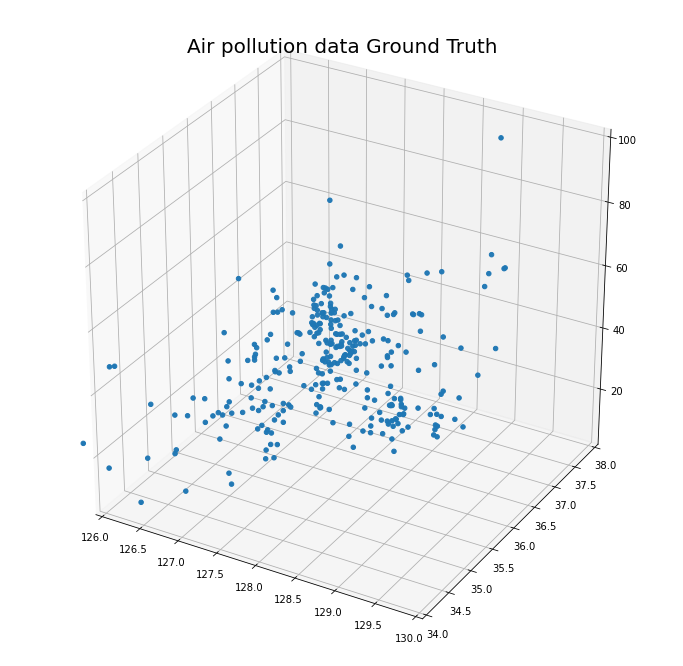

In [87]:
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax1 = fig.gca(projection = '3d')
ax1.scatter(coo2,coo1, z1)
ax1.axis([126, 130, 34, 38])

plt.title("Air pollution data Ground Truth", fontsize=20)
plt.savefig("fig4.jpg")
plt.show()

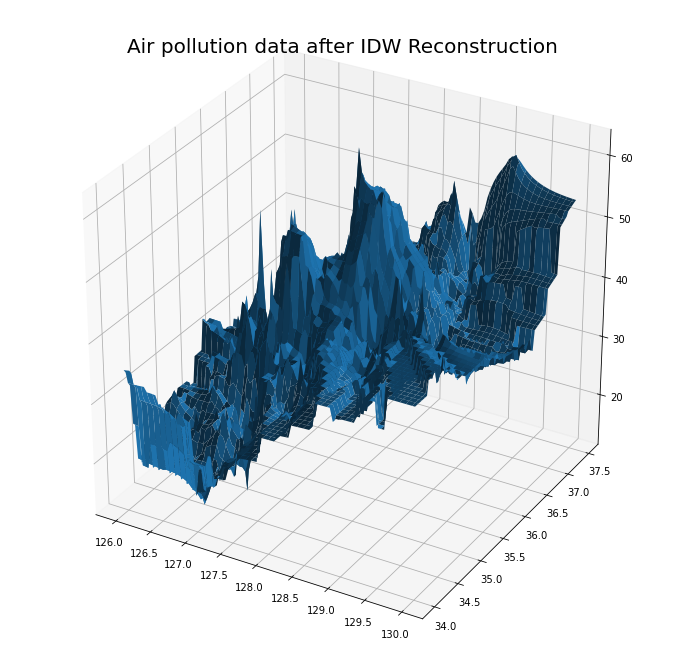

In [88]:
X21, X22 = np.meshgrid(new_lat, new_lon)

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax3 = fig.gca(projection = '3d')
ax3.plot_surface(X22, X21 , z2.reshape(grid_shape))

plt.title("Air pollution data after IDW Reconstruction", fontsize=20)
plt.savefig("fig5.jpg")
plt.show()

## 5. Make Dataset

In [90]:
print(X21.shape)
print(X22.shape)
print(z2.reshape(grid_shape).shape)

(100, 100)
(100, 100)
(100, 100)


In [89]:
np.savetxt('Interpolation_air_pollution/Hour1_inter_lat.txt', X21)
np.savetxt('Interpolation_air_pollution/Hour1_inter_lon.txt', X22)
np.savetxt('Interpolation_air_pollution/Hour1_inter_p.txt', z2.reshape(grid_shape))

## 6. Save for 24 hours

In [95]:
for hour in range(24) :
    path = os.path.join(os.getcwd(), 'air_pollution_new', 'Hour_{}'.format(hour+1) + '.csv')
    dataset = pd.read_csv(path, encoding = 'cp949')
    data = dataset.values[:,:]

    latitude = data[:,1]
    longitude = data[:,2]
    z = data[:,3]
    
    coo = []

    for i in range(len(z)):
        coo.append([latitude[i], longitude[i]])
        
    zz = []
    for i in range(len(z)):
        zz.append([z[i]])
    
    coo = np.array(coo)
    zz = np.array(zz)
    coo1 = np.array(coo[:,0])
    coo2 = np.array(coo[:,1])
    
    X1 = coo
    z1 = zz
    
    idw_tree = idw.tree(X1, z1)
    new_lat = np.arange(34, 37.51, 0.0351)
    new_lon = np.arange(126, 130.001, 0.0403)  
    X21, X22 = np.meshgrid(new_lat, new_lon)
    
    X2 = np.meshgrid(new_lat, new_lon)
    grid_shape = X2[0].shape
    X2 = np.reshape(X2, (2, -1)).T
    z2 = idw_tree(X2)
    
    print(z2)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_lat.txt', X21)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_lon.txt', X22)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_p.txt', z2.reshape(grid_shape))

[35.0254011  34.36372571 32.41302544 ... 53.11849264 53.26712481
 53.413317  ]
[28.7712689  28.25247167 27.62146131 ... 46.48739915 46.61734511
 46.74614681]
[23.03025015 22.96645247 24.59136529 ... 40.26629592 40.17694996
 40.09251077]
[25.2258625  25.12271379 23.23408925 ... 27.65993169 27.56879292
 27.48291231]
[33.83642356 33.58326432 30.66116376 ... 20.95704274 20.87394642
 20.79552886]
[40.97852923 40.37390081 38.19628725 ... 29.16966004 29.10911971
 29.0498629 ]
[36.14653678 35.77503503 38.08190306 ... 47.31568788 47.4176938
 47.51015467]
[45.39643975 44.6369861  44.302312   ... 53.51851474 53.64344703
 53.75874009]
[48.93370913 48.44094824 47.89877501 ... 57.47268469 57.59833164
 57.71510857]
[55.76494205 55.32803233 53.55005683 ... 56.94519879 56.95092173
 56.95455751]
[59.06376888 58.74522531 64.48132373 ... 55.66358435 55.59405617
 55.52558368]
[60.31725044 60.44256649 60.69867927 ... 69.78140926 69.85339981
 69.92176227]
[67.08456762 67.0674441  68.00382758 ... 73.0210067  

### Reference
- [1] [inverse_distance_weighting], https://github.com/paulbrodersen/inverse_distance_weighting/blob/master/LICENSE